In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
%matplotlib inline

In [2]:
df = dt.fread("numerai_training_data.csv")
df = df.to_pandas()
df=pd.read_csv("numerai_training_data.csv")

if df.data_type.unique() == "train":
    df.drop("data_type", axis=1, inplace=True)

In [3]:
df.set_index("id", inplace=True)
#df["erano"] = df.era.str.slice(3).astype(int)

In [4]:
df["extreme_target"] = df["target"].apply(lambda x: 1 if x == 1 or x==0 else 0)

In [5]:
df

,era,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,...,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target,extreme_target
id,,,,,,,,,,,,,,,,,,,,,
n000315175b67977,era1,0.00,0.50,0.25,0.00,0.50,0.25,0.25,0.25,0.75,...,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.50,0
n0014af834a96cdd,era1,0.00,0.00,0.00,0.25,0.50,0.00,0.00,0.25,0.50,...,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25,0
n001c93979ac41d4,era1,0.25,0.50,0.25,0.25,1.00,0.75,0.75,0.25,0.00,...,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.25,0
n0034e4143f22a13,era1,1.00,0.00,0.00,0.50,0.50,0.25,0.25,0.75,0.25,...,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.25,0
n00679d1a636062f,era1,0.25,0.25,0.25,0.25,0.00,0.25,0.50,0.25,0.25,...,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nff6a8a8feaeeb52,era120,0.50,0.50,0.25,0.00,0.00,0.50,0.75,0.00,0.75,...,0.50,0.75,0.50,0.50,0.75,0.25,0.25,0.25,0.50,0
nff6af62a0996372,era120,1.00,0.00,0.00,1.00,0.50,0.75,0.75,1.00,0.00,...,1.00,1.00,1.00,1.00,0.00,0.75,1.00,1.00,0.75,0
nff9288983b8c040,era120,0.75,0.50,0.50,0.50,0.25,0.50,0.25,0.50,0.25,...,0.75,0.25,1.00,1.00,1.00,0.25,0.00,0.00,0.25,0


In [6]:
data = df.iloc[:,1:311].values
size = data.shape[0] * data.shape[1]

for value in [0, 0.25, 0.5, 0.75, 1]:
    count = np.array(df.iloc[:,1:311].values == value).sum()
    print(f"Count of value {value} is {count}")
    print(f"Proportion of value {value} is {count/size}")

Count of value 0 is 29180532
Proportion of value 0 is 0.18758319593768288
Count of value 0.25 is 29158468
Proportion of value 0.25 is 0.1874413604277899
Count of value 0.5 is 38889796
Proportion of value 0.5 is 0.24999791720879236
Count of value 0.75 is 29158468
Proportion of value 0.75 is 0.1874413604277899
Count of value 1 is 29173216
Proportion of value 1 is 0.18753616599794498


target
0.00     25016
0.25    100053
0.50    251677
0.75    100045
1.00     25017
dtype: int64


array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

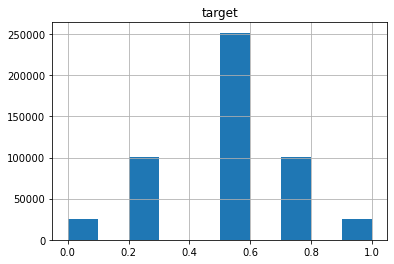

In [7]:
print(df.groupby("target").size())
df.hist(column="target")